# SVM & KNN

### DATASET

In [ ]:
import pandas as pd
import numpy as np 
import random
import math
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score


In [ ]:
df = pd.read_csv('wineQuality.csv')
df

,Unnamed: 0,Unnamed: 0.1,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,2,2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,3,3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,4,4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6491,6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6459,6492,6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6460,6494,6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6461,6495,6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.type.unique()

array(['white', 'red'], dtype=object)

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
X = df.drop( 'type',axis=1)
y= df.type

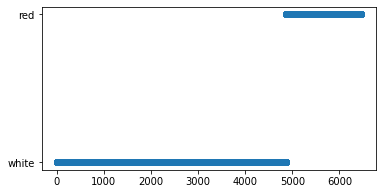

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(np.arange(len(X)), y)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 1) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

mse_knn=[]
acc_knn=[]
K_MIN = 2
K_MAX =20
arr_K = np.arange(K_MIN,K_MAX)
for K in arr_K :
    model =  KNeighborsClassifier(n_neighbors = K)
    model = model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_knn.append(acc) 


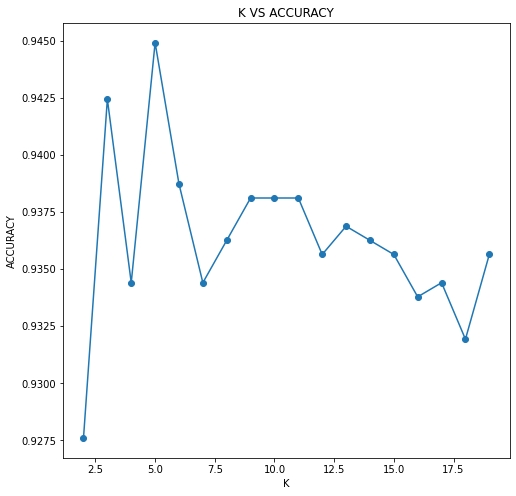

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(K_MIN , K_MAX), acc_knn)
plt.scatter(np.arange(K_MIN , K_MAX), acc_knn)
plt.xlabel('K')
plt.ylabel('ACCURACY')
plt.title('K VS ACCURACY')
plt.show()

Best K according to the graph is K=5

### MANHATTAN

In [ ]:
knn2 =  KNeighborsClassifier(n_neighbors = K , p=1)
knn2 = knn2.fit(X_train, y_train) 
y_pred2 = knn2.predict(X_test)

acc_knn2 = accuracy_score(y_test, y_pred2)

print("ACCURACY FOR MANHATTAN : ", acc_knn2)



ACCURACY FOR MANHATTAN :  0.9443069306930693


### EUCLIDEAN

In [ ]:
knn3 =  KNeighborsClassifier(n_neighbors = K , p=2)
knn3 = knn3.fit(X_train, y_train) 
y_pred3 = knn3.predict(X_test)

acc_knn3 = accuracy_score(y_test, y_pred3)

print("ACCURACY FOR EUCLIDEAN : ", acc_knn3)



ACCURACY FOR EUCLIDEAN :  0.9356435643564357


### Distance Power for Best K

In [ ]:
BEST_K = 5

from sklearn.neighbors import KNeighborsClassifier

acc_knn=[]
P_MIN = 1
P_MAX =10
arr_K = np.arange(P_MIN,P_MAX)
for p in arr_K :
    model =  KNeighborsClassifier(n_neighbors = 5 , p=p)
    model = model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_knn.append(acc) 


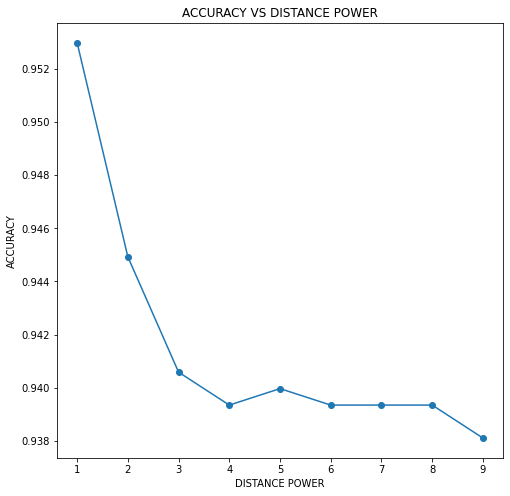

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(P_MIN , P_MAX), acc_knn)
plt.scatter(np.arange(P_MIN , P_MAX), acc_knn)
plt.xlabel('DISTANCE POWER')
plt.ylabel('ACCURACY')
plt.title('ACCURACY VS DISTANCE POWER')
plt.show()

# 2)  SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X, y)
y_pred = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)

print("ACCURACY FOR MANHATTAN : ", acc_svm)

ACCURACY FOR MANHATTAN :  1.0


## SQUARED L2 PENALTY

In [ ]:
acc_svm_l2=[]
C_MIN = 1
C_MAX =11
arr_C = np.arange(C_MIN,C_MAX)
for i in arr_C :
    model =  SVC(C = i)
    model = model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_svm_l2.append(acc) 


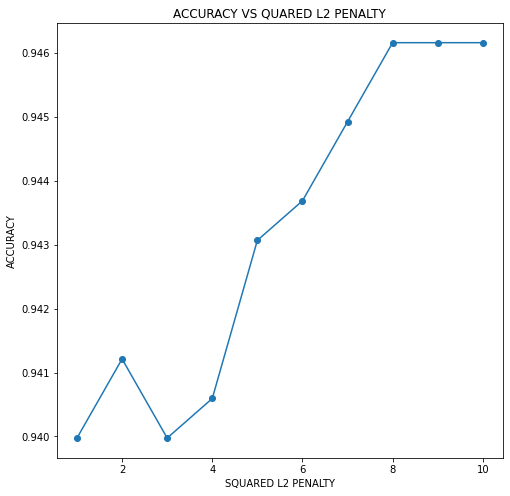

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(C_MIN , C_MAX), acc_svm_l2)
plt.scatter(np.arange(C_MIN , C_MAX), acc_svm_l2)
plt.xlabel('SQUARED L2 PENALTY')
plt.ylabel('ACCURACY')
plt.title('ACCURACY VS QUARED L2 PENALTY')
plt.show()

## KERNEL


In [ ]:
acc_svm=[]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernel :
    model =  SVC(kernel = ker)
    model = model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_svm.append(acc) 


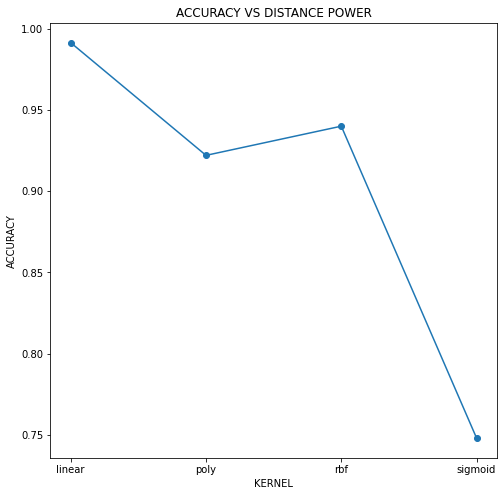

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(kernel, acc_svm)
plt.scatter(kernel, acc_svm)
plt.xlabel('KERNEL')
plt.ylabel('ACCURACY')
plt.title('ACCURACY VS DISTANCE POWER')
plt.show()

## NON LINEAR DATA

In [ ]:
from sklearn.datasets import make_circles
X_circle, y_circle = make_circles(n_samples=200 , noise=0.1, factor=0.2, random_state=1)
X1 = X_circle[:, 0].flatten()
X2 = X_circle[:, 1].flatten()

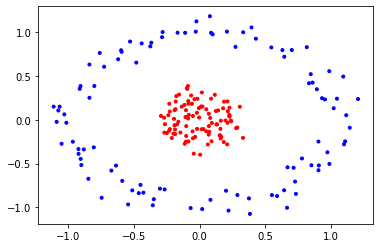

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['blue', 'red'])                    
plt.scatter(X1,X2, c=y_circle ,marker='.', cmap=cmap)
plt.show()

In [ ]:
X_train_circle, X_test_circle, y_train_circle, y_test_circle = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
acc_svm_circle=[]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernel :
    model =  SVC(kernel = ker)
    model = model.fit(X_train_circle, y_train_circle) 
    y_pred_circle = model.predict(X_test_circle)
    acc_circle = accuracy_score(y_test_circle, y_pred_circle)
    acc_svm_circle.append(acc_circle) 


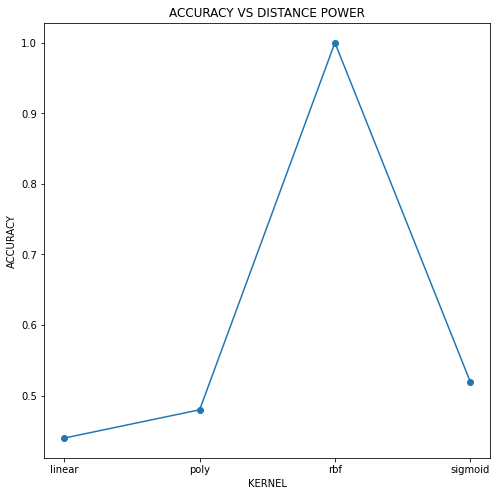

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(kernel, acc_svm_circle)
plt.scatter(kernel, acc_svm_circle)
plt.xlabel('KERNEL')
plt.ylabel('ACCURACY')
plt.title('ACCURACY VS NON')
plt.show()

POLYNOMIAL

In [ ]:
import random 
X_poly =[]
y_poly =[]

for i in range(100):
  x = random.randint(1, 500)
  X_poly.append(x)
  y_poly.append(x**(1/5) + 3*(x**3) - 2*(x**2)+ x +10)


<Figure size 576x576 with 0 Axes>

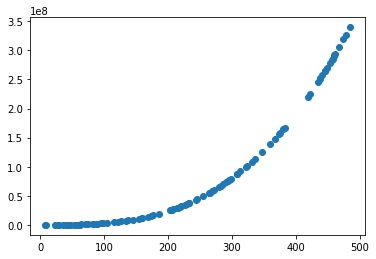

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.scatter(X_poly, y_poly)
plt.figure(figsize=(8,8))

In [ ]:
from sklearn.datasets import make_blobs
X_poly, y_poly = make_blobs(n_samples=200,center_box=(-10,10), cluster_std=5,centers=2, n_features=2 , random_state=2)
X1_blob = X_poly[:, 0].flatten()
X2_blob = X_poly[:, 1].flatten()

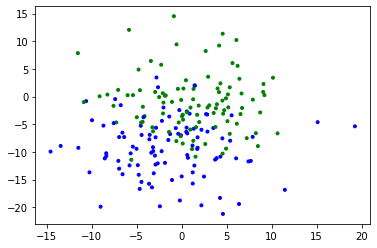

<Figure size 576x576 with 0 Axes>

In [ ]:

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['blue', 'red', 'green'])                    
plt.scatter(X1_blob, X2_blob, c=y_poly ,marker='.', cmap=cmap)
plt.figure(figsize=(8,8))
plt.show()

In [ ]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
acc_svm_poly=[]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernel :
    model =  SVC(kernel = ker)
    model = model.fit(X_train_poly, y_train_poly) 
    y_pred_poly = model.predict(X_test_poly)
    acc_poly = accuracy_score(y_test_poly, y_pred_poly)
    acc_svm_poly.append(acc_poly) 


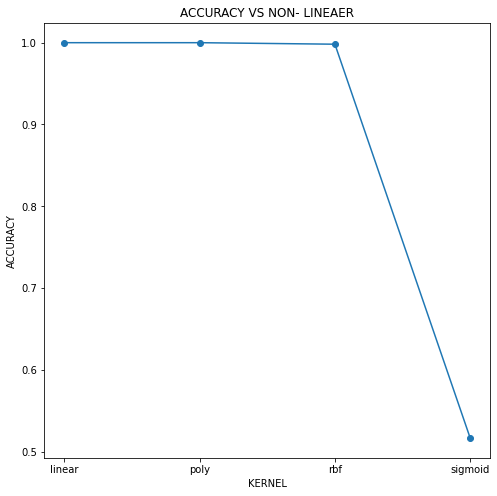

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(kernel, acc_svm_poly)
plt.scatter(kernel, acc_svm_poly)
plt.xlabel('KERNEL')
plt.ylabel('ACCURACY')
plt.title('ACCURACY VS NON- LINEAER')
plt.show()